In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/09_groups.csv")

Frequent buyers

In [20]:
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [21]:
from collections import Counter

common_buyers = Counter(df['id_card']).most_common()

In [22]:
common_buyers

[(883386, 189812),
 (568930, 753),
 (1243870, 707),
 (518424, 694),
 (213588, 675),
 (1217776, 672),
 (479858, 660),
 (1025552, 645),
 (1137696, 640),
 (828583, 630),
 (907152, 625),
 (440354, 623),
 (817278, 622),
 (5959, 620),
 (1441185, 612),
 (497966, 609),
 (647601, 600),
 (1000294, 592),
 (1062580, 588),
 (680243, 583),
 (937039, 574),
 (1120884, 563),
 (533540, 562),
 (230546, 559),
 (1810863, 557),
 (1640239, 556),
 (279321, 552),
 (1402439, 551),
 (784759, 548),
 (88263, 548),
 (297027, 546),
 (542043, 543),
 (1211493, 542),
 (411998, 538),
 (421742, 538),
 (342656, 535),
 (710070, 530),
 (96493, 526),
 (600695, 524),
 (1606080, 523),
 (1447941, 522),
 (773633, 522),
 (315084, 521),
 (57748, 518),
 (198929, 517),
 (288752, 517),
 (9676, 516),
 (196293, 515),
 (1024720, 515),
 (1071249, 514),
 (761714, 514),
 (425024, 513),
 (238391, 512),
 (1566108, 512),
 (13789, 512),
 (345936, 512),
 (428060, 512),
 (307111, 511),
 (483533, 510),
 (1128041, 510),
 (725901, 510),
 (1027635, 

Average purchase sum

In [24]:
avg_sum = df.groupby("id_doc")['sum'].mean()

$H_0$: Buying discounted products depends on the average order sum

In [31]:
discount_in_receipt = df.groupby("id_doc")['is_green'].sum()

avg_sum = avg_sum.to_list()
discount_in_receipt = discount_in_receipt.to_list()

In [37]:
from scipy.stats import pearsonr

In [38]:
pearsonr(discount_in_receipt, avg_sum)

(-0.12509638905839576, 0.0)

Correlation coefficient is negative, but it should be positive to accept $H_0$, then reject $H_0$

Usual cart - The customers grouped by the product groups

In [6]:
usual_cart = df.groupby("id_tov")["id_card"].agg(lambda x: ";".join(map(str,x)))

In [7]:
usual_cart

id_tov
46       1407376;334298;1430811;1430811;1430811;585298;...
52       1538855;267307;610220;441497;256114;256118;238...
61       1065358;375644;736538;142160;1408467;641525;21...
69       1805657;801763;318237;96877;280778;108177;1376...
71       93180;672235;672235;115708;391703;1233094;1832...
                               ...                        
38546    186127;1011106;1430264;1759196;1117780;1071914...
38587    1212088;399475;1105513;141468;1736039;9864;888...
38618    1706918;604589;125835;198126;948957;675834;129...
38645        444004;1370462;253891;1163221;1448335;1575583
38660                                              1454833
Name: id_card, Length: 6081, dtype: object

In [8]:
del usual_cart

$H_0$: The frequency of shopping grows around the wage taking days (1-6 days of each month, 20 -26 days of each month)

In [25]:
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')

In [26]:
df.tail()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
date,,,,,,,,,,
2020-09-30 11:26:28,2020-09-30 11:26:28,4850561,0.0,1739990,25292,17528,1.0,130.0,0,10099
2020-09-30 08:12:39,2020-09-30 08:12:39,10015419,0.0,1761351,30740,19188,2.0,120.0,0,10008
2020-09-30 09:54:24,2020-09-30 09:54:24,22816791,0.0,1432778,30741,19188,1.0,73.0,0,10254
2020-09-30 12:00:04,2020-09-30 12:00:04,1648929,0.0,484390,34835,15916,1.0,78.0,0,10099
2020-09-30 09:37:16,2020-09-30 09:37:16,22302533,0.0,557627,34835,15916,1.0,78.0,0,10099


In [31]:
num_of_buyings = df.groupby(by=[df.index.day])['id_doc'].count()

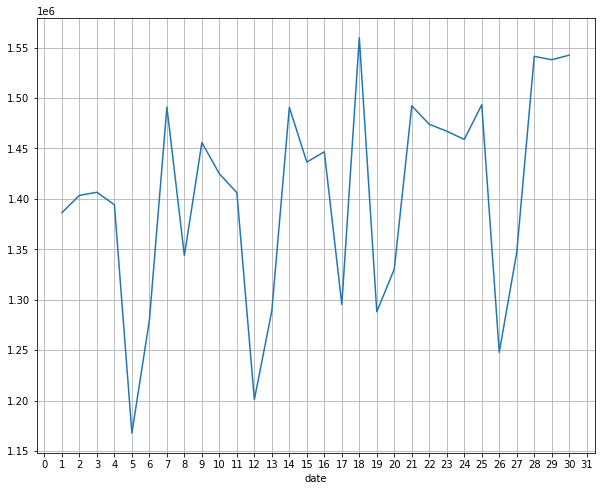

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.locator_params(axis="x", nbins=50)
num_of_buyings.plot()
plt.grid()

As we can see from the plot the number of buyings are decreasing in dates of 1-6 and 20-26. Failed to reject $H_0$